In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [262]:
df = pd.read_csv("data/cleaned-premier-league-data.csv")

In [263]:
df.shape

(1246, 11)

In [264]:
list(df)

['date',
 'home_team',
 'away_team',
 'home_outcome',
 'avg_odd_home_win',
 'avg_odd_draw',
 'avg_odd_away_win',
 'home_ranking',
 'away_ranking',
 'last_home_result',
 'last_away_result']

In [265]:
df.info

<bound method DataFrame.info of             date  home_team  away_team  home_outcome  avg_odd_home_win  \
0     08/08/2015          2          1             0             7.024   
1     08/08/2015          6         22             1             6.697   
2     08/08/2015          8         24             1             6.842   
3     08/08/2015         12         21             2             7.000   
4     08/08/2015         15         23             2             6.477   
...          ...        ...        ...           ...               ...   
1241  12/05/2019         13         27             2             6.619   
1242  12/05/2019         15          5             0             6.563   
1243  12/05/2019         19         10             1             6.204   
1244  12/05/2019         23          8             1             6.153   
1245  12/05/2019         24         26             0             6.192   

      avg_odd_draw  avg_odd_away_win  home_ranking  away_ranking  \
0          

In [266]:
df.describe

<bound method NDFrame.describe of             date  home_team  away_team  home_outcome  avg_odd_home_win  \
0     08/08/2015          2          1             0             7.024   
1     08/08/2015          6         22             1             6.697   
2     08/08/2015          8         24             1             6.842   
3     08/08/2015         12         21             2             7.000   
4     08/08/2015         15         23             2             6.477   
...          ...        ...        ...           ...               ...   
1241  12/05/2019         13         27             2             6.619   
1242  12/05/2019         15          5             0             6.563   
1243  12/05/2019         19         10             1             6.204   
1244  12/05/2019         23          8             1             6.153   
1245  12/05/2019         24         26             0             6.192   

      avg_odd_draw  avg_odd_away_win  home_ranking  away_ranking  \
0        

In [267]:
df['ranking_diff'] = df['home_ranking']-df['away_ranking']

In [268]:
wins_df = df[df['home_outcome'] ==2]

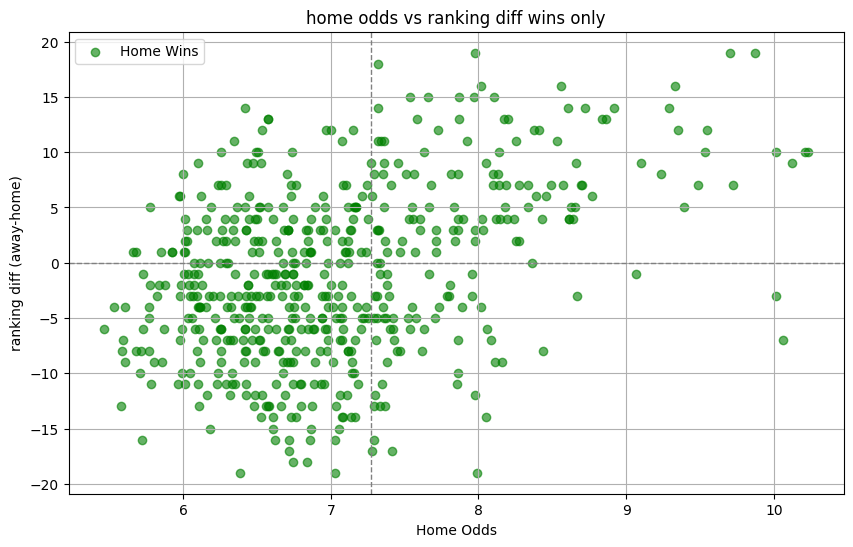

In [269]:
plt.figure(figsize=(10,6))
plt.scatter(wins_df['avg_odd_home_win'],wins_df['ranking_diff'],
            c='green',alpha=0.6,label='Home Wins')
plt.xlabel('Home Odds')
plt.ylabel('ranking diff (away-home)')
plt.title('home odds vs ranking diff wins only')
plt.axhline(0,color='grey',linestyle='--',linewidth=1)
plt.axvline(df['avg_odd_home_win'].mean(),color='grey',linestyle='--',linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

In [270]:
X = df[['avg_odd_home_win', 'ranking_diff', 'avg_odd_draw','avg_odd_away_win','last_home_result']]
y = df['home_outcome']


In [271]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [272]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(996, 5)
(996,)
(250, 5)
(250,)


In [273]:

forestclassification = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
forestclassification.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [274]:
y_pred = forestclassification.predict(X_test)

In [275]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.45      0.47        89
           1       0.32      0.21      0.25        63
           2       0.51      0.67      0.58        98

    accuracy                           0.48       250
   macro avg       0.44      0.44      0.43       250
weighted avg       0.46      0.48      0.46       250

[[40 14 35]
 [22 13 28]
 [18 14 66]]
accuracy: 0.476


precission is how accurate in percentage the model was at guessing certain outcomes ie 0 = a team losing it have an accuracy of 56% of. 
the overarching accuracy of the entire model is 48%

the matrix works as following taking the first row,39 nine was placed correctly in the loss,14 was wrongly calculated in draw and 36 was wrongly placed in win repeat per row

In [276]:
model_file = 'data/myrandomforest.pkl'

joblib.dump(forestclassification,model_file)

['data/myrandomforest.pkl']

In [279]:
load_model = joblib.load(model_file)
y_predict = load_model.predict(X_test)
